# Emotion Detection using AlexNet

### Download dataset from kaggle

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

# print("Path to dataset files:", path)

### Importing the libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras.layers as tfl

2025-07-04 22:26:00.592523: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Read the images from directorty and create dataset

In [3]:


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/developer/Coding/Kaggle/Emotion_detection/dataset/train',
    shuffle=True,
    image_size=(128,128),
    batch_size=128
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/developer/Coding/Kaggle/Emotion_detection/dataset/test',
    shuffle=True,
    image_size=(128,128),
    batch_size=128
)



Found 28709 files belonging to 7 classes.


2025-07-04 22:26:23.989966: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 7178 files belonging to 7 classes.


### Normalize the image data by dividing each entry by 255

In [5]:


def normalize_image(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(normalize_image)
test_ds = test_ds.map(normalize_image)



In [6]:
for images, labels in train_ds.take(3):
  print(images.shape, labels.shape)

2025-07-04 22:26:25.679571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [28709]
	 [[{{node Placeholder/_4}}]]
2025-07-04 22:26:25.681068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [28709]
	 [[{{node Placeholder/_4}}]]


(128, 128, 128, 3) (128,)
(128, 128, 128, 3) (128,)
(128, 128, 128, 3) (128,)



### Creating the AlexNet model

In [7]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    -----------------------------CNN-----------------------------------------------------
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(filters=8, kernel_size = (4,4), strides = 1,padding = 'same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8),strides=8,padding='same')(A1)
    Z2 = tfl.Conv2D(filters=16, kernel_size = (2,2),strides= 1, padding="same")(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4,4),strides=4,padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=7, activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)

----------------------------------------------------------------------------------------
"""
## AlexNet
    model = tf.keras.models.Sequential([
    # 1st conv
    tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
    tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(),
     # 3rd conv
    tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(),
    # 4th conv
    tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(),
    # 5th Conv
    tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
    # To Flatten layer
    tf.keras.layers.Flatten(),
    # To FC layer 1
    tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
    #To FC layer 2
    tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 7, activation='sigmoid')])
    return model

In [8]:
input_shape = (128,128,3)
conv_model = convolutional_model(input_shape)
conv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 256)       2973952   
                                                                 
 batch_normalization_1 (Batc  (None, 15, 15, 256)      1024      
 hNormalization)                                                 
                                                        

In [9]:
# Calculate the number of training and validation batches
train_size = int(0.8 * tf.data.experimental.cardinality(train_ds).numpy())
val_size = tf.data.experimental.cardinality(train_ds).numpy() - train_size

# Split the dataset
train_ds = train_ds.take(train_size)
val_ds = train_ds.skip(train_size)


history = conv_model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100


2025-07-04 22:26:38.279798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [28709]
	 [[{{node Placeholder/_4}}]]
2025-07-04 22:26:38.280175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [28709]
	 [[{{node Placeholder/_0}}]]


180/180 [==============================] - 1717s 10s/step - loss: 3.3413 - accuracy: 0.2480
Epoch 2/100


2025-07-04 22:55:15.350787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [28709]
	 [[{{node Placeholder/_4}}]]
2025-07-04 22:55:15.353031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [28709]
	 [[{{node Placeholder/_4}}]]


180/180 [==============================] - 1743s 10s/step - loss: 1.7657 - accuracy: 0.2742
Epoch 3/100
180/180 [==============================] - 1840s 10s/step - loss: 1.7259 - accuracy: 0.3043
Epoch 4/100
180/180 [==============================] - 1923s 11s/step - loss: 1.7005 - accuracy: 0.3192
Epoch 5/100
180/180 [==============================] - 1941s 11s/step - loss: 1.6599 - accuracy: 0.3440
Epoch 6/100
180/180 [==============================] - 1960s 11s/step - loss: 1.5768 - accuracy: 0.3856
Epoch 7/100
180/180 [==============================] - 1962s 11s/step - loss: 1.5219 - accuracy: 0.4056
Epoch 8/100
180/180 [==============================] - 1966s 11s/step - loss: 1.4611 - accuracy: 0.4352
Epoch 9/100
180/180 [==============================] - 1961s 11s/step - loss: 1.4033 - accuracy: 0.4529
Epoch 10/100
180/180 [==============================] - 1975s 11s/step - loss: 1.3477 - accuracy: 0.4780
Epoch 11/100
180/180 [==============================] - 1988s 11s/step - lo

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

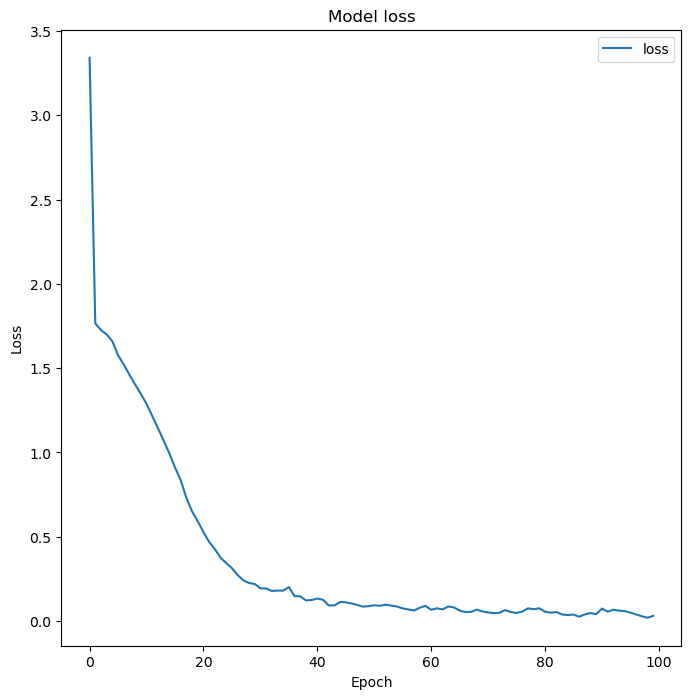

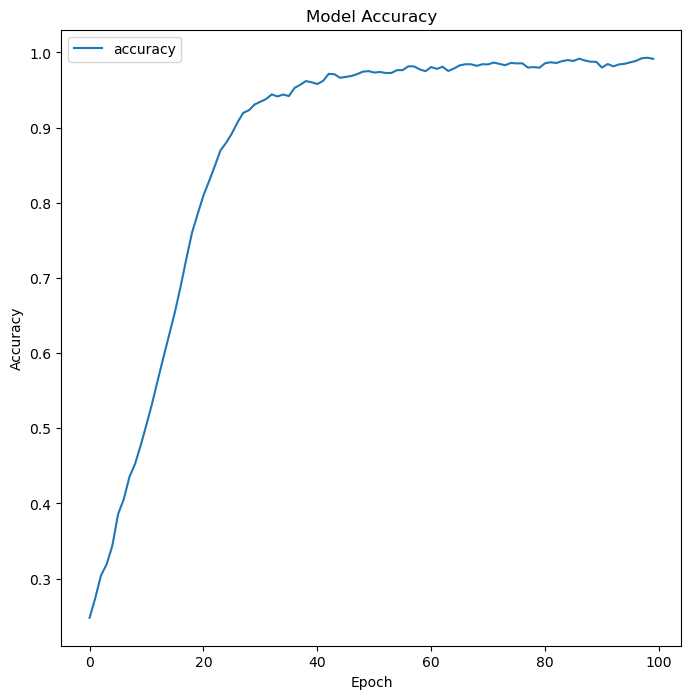

In [10]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss',]]
df_acc= df_loss_acc[['accuracy']]
df_loss.plot(title='Model loss',figsize=(8,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(8,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [116]:
conv_model.save("emotion_detection_model.h5")

In [119]:
test_result = conv_model.evaluate(test_ds)

2025-07-07 19:24:33.539231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7178]
	 [[{{node Placeholder/_4}}]]
2025-07-07 19:24:33.540135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7178]
	 [[{{node Placeholder/_4}}]]


57/57 [==============================] - 251s 4s/step - loss: 4.6824 - accuracy: 0.5143


In [120]:
test_result

[4.682387351989746, 0.5143494009971619]

In [13]:
from PIL import Image

In [90]:
CLASS_NAMES = ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']

In [91]:
# Image preprocessing
def preprocess_image(image, target_size=(128, 128)):
    image = image.convert('RGB')  # make sure 3 channels
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # normalize
    image = np.expand_dims(image, axis=0)  # add batch dimension
    return image

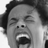

In [110]:
image_path ="/home/developer/Coding/Kaggle/Emotion_detection/dataset/train/sad/im142.png"
image = Image.open(image_path)
image

In [111]:
processed_image = preprocess_image(image)

predictions = conv_model.predict(processed_image)[0]

predicted_class = CLASS_NAMES[np.argmax(predictions)]
confidence = np.max(predictions)

for label, prob in zip(CLASS_NAMES, predictions):
    print(label,prob)

1/1 [==============================] - 0s 82ms/step
Angry 0.0035093015
Disgusted 0.007242151
Fearful 0.07212063
Happy 7.1178736e-05
Neutral 1.7675346e-05
Sad 0.9999972
Surprised 0.015478464


In [112]:
predictions

array([3.5093015e-03, 7.2421511e-03, 7.2120629e-02, 7.1178736e-05,
       1.7675346e-05, 9.9999720e-01, 1.5478464e-02], dtype=float32)

In [113]:
np.argmax(predictions)

5

In [114]:
CLASS_NAMES[np.argmax(predictions)]

'Sad'

In [115]:
np.max(predictions)

0.9999972